<a href="https://colab.research.google.com/github/Andrea-datasc/github-slideshow/blob/master/T_CardioData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files_to_upload = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
data = pd.read_csv("cardio_train.csv", sep = ";")

In [ ]:
data.head()

id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0  ...     1      0     0       1       0
1   1  20228       1     156    85.0  ...     1      0     0       1       1
2   2  18857       1     165    64.0  ...     1      0     0       0       1
3   3  17623       2     169    82.0  ...     1      0     0       1       1
4   4  17474       1     156    56.0  ...     1      0     0       0       0

[5 rows x 13 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
data.describe()

id           age  ...        active        cardio
count  70000.000000  70000.000000  ...  70000.000000  70000.000000
mean   49972.419900  19468.865814  ...      0.803729      0.499700
std    28851.302323   2467.251667  ...      0.397179      0.500003
min        0.000000  10798.000000  ...      0.000000      0.000000
25%    25006.750000  17664.000000  ...      1.000000      0.000000
50%    50001.500000  19703.000000  ...      1.000000      0.000000
75%    74889.250000  21327.000000  ...      1.000000      1.000000
max    99999.000000  23713.000000  ...      1.000000      1.000000

[8 rows x 13 columns]

In [ ]:
# Age is in days, we convert to years
data['age'] = data['age'] / 365

In [ ]:
data.describe()

id           age  ...        active        cardio
count  70000.000000  70000.000000  ...  70000.000000  70000.000000
mean   49972.419900     53.339358  ...      0.803729      0.499700
std    28851.302323      6.759594  ...      0.397179      0.500003
min        0.000000     29.583562  ...      0.000000      0.000000
25%    25006.750000     48.394521  ...      1.000000      0.000000
50%    50001.500000     53.980822  ...      1.000000      0.000000
75%    74889.250000     58.430137  ...      1.000000      1.000000
max    99999.000000     64.967123  ...      1.000000      1.000000

[8 rows x 13 columns]

Some of the features are binary (smoke, alco, active, cardio), so the standard descriptive statistics - mean, standard deviation, median, quartiles - are meaningless for them. In this case, the usual counting of values ​​will be more useful. 

In [ ]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [ ]:
data['smoke'].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [ ]:
data['alco'].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [ ]:
data['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [ ]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
# Remove all patients with a height below above 220 cm
data = data.drop(data[(data['height'] < 100) | (data['height'] > 215)].index)

In [ ]:
# The scale of the pressure meter ranges from 0 to 300 mmHg. 50 to 250 would be extremes. 
# Remove all patients with a Diastolic blood pressures or systolic blood pressure outside this ranges
data = data.drop(data[(data['ap_lo'] < 50) | (data['ap_lo'] > 250)].index)
data = data.drop(data[(data['ap_hi'] < 50) | (data['ap_hi'] > 250)].index)

In [ ]:
data.describe()

id           age  ...        active        cardio
count  68698.000000  68698.000000  ...  68698.000000  68698.000000
mean   49972.832106     53.326644  ...      0.803415      0.494774
std    28845.890537      6.761872  ...      0.397419      0.499976
min        0.000000     29.583562  ...      0.000000      0.000000
25%    24997.250000     48.375342  ...      1.000000      0.000000
50%    50016.500000     53.975342  ...      1.000000      0.000000
75%    74872.250000     58.421918  ...      1.000000      1.000000
max    99999.000000     64.967123  ...      1.000000      1.000000

[8 rows x 13 columns]

In [ ]:
# Histogram with Age
fig = px.histogram(
    data_frame = data,
    x='age',
    nbins = 10
)
fig.show()

In [ ]:
# Histogram with Height
fig = px.histogram(
    data_frame = data,
    x='height',
    nbins = 20
)
fig.show()

In [ ]:
# Histogram with weight
fig = px.histogram(
    data_frame = data,
    x='weight',
    nbins = 10
)
fig.show()

In [ ]:
# Create the box plot
fig = px.box(
  			# Set the data
  			data_frame=data, 
  			# Set the y variable
            y='ap_hi', 
            # Add in hover data to see outliers (a list of one string value) to show the id.
            hover_data=['id'])

# Show the plot
fig.show()

In [ ]:
# Box and Whisker plots ap_lo

# Create the box plot
fig = px.box(
  			# Set the data
  			data_frame=data, 
  			# Set the y variable
            y='ap_lo', 
            # Add in hover data to see outliers (a list of one string value) to show the id.
            hover_data=['id'])

# Show the plot
fig.show()

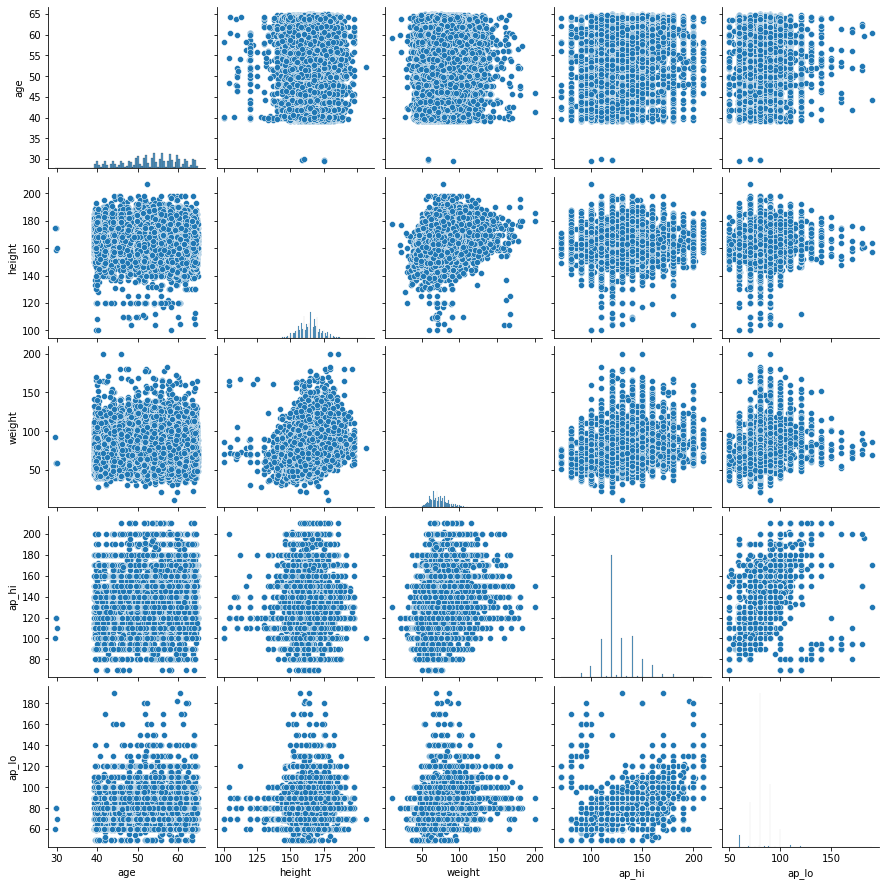

In [ ]:
# Basic correlogram
sns.pairplot(data, vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo'],
       )
plt.show()